## Clusterig jerárquico y dendrogramas

* X dataset (Array de nxm) de puntos a clusterizar
* n número de datos
* m numero de rasgos
* Z array de enlace del cluster ocon la información de las uniones
* k numero de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt

(150, 2)


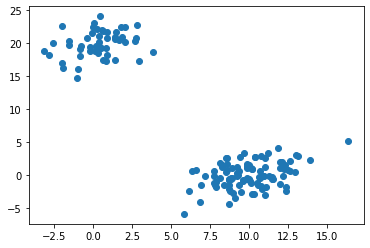

In [2]:
np.random.seed(4711)
a = np.random.multivariate_normal([10, 0] , [[3,1], [1, 4]], size = [100,])
b = np.random.multivariate_normal([0, 20] , [[3,1], [1, 4]], size = [50,])
X = np.concatenate((a, b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
Z = linkage(X, "ward")

In [4]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [5]:
c, coph_distance = cophenet(Z, pdist(X))
c

0.9800148387574268

In [6]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [7]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [8]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [9]:
Z[152-len(X)] # Para saber q puntos pertencen al cluster 152

array([33.        , 68.        ,  0.07106779,  2.        ])

In [10]:
Z[158-len(X)]

array([15.        , 69.        ,  0.11428971,  2.        ])

In [11]:
X[[33, 62, 68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

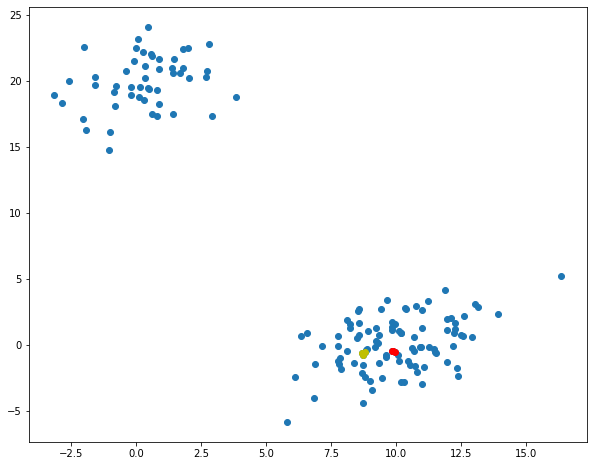

In [12]:
idx= [33, 62, 68]
idx2 = [41, 15, 69]
plt.figure(figsize=(10,8)) 
plt.scatter(X[:, 0], X[:, 1])## Pintar todos los puntos, la notacion es :,0 (datas las filas y columna 0) y :,1 (datas las filas y columna 1)
plt.scatter(X[idx, 0], X[idx, 1], c='r')## filas idx columna cero y idx columna 0
plt.scatter(X[idx2, 0], X[idx2, 1], c='y')## filas idx columna cero y idx columna 0
plt.show()

## Representación grafica de un dendrograma

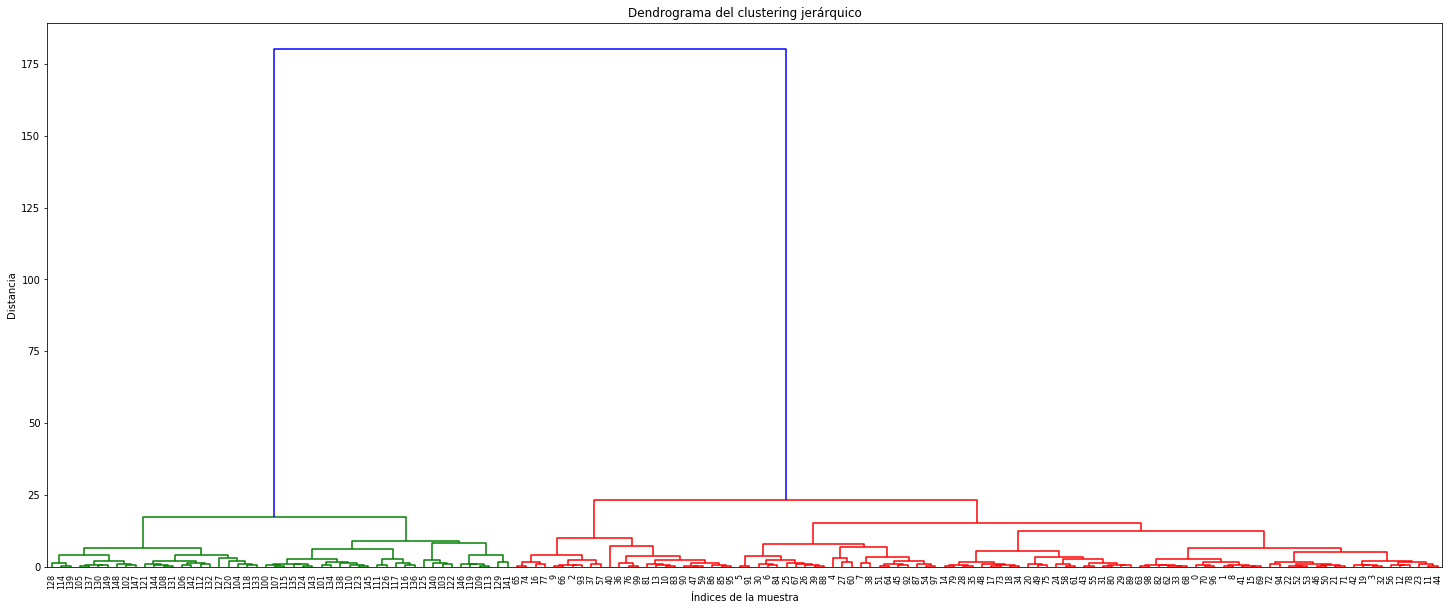

In [13]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90.,leaf_font_size=8.0)
plt.show()

In [14]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

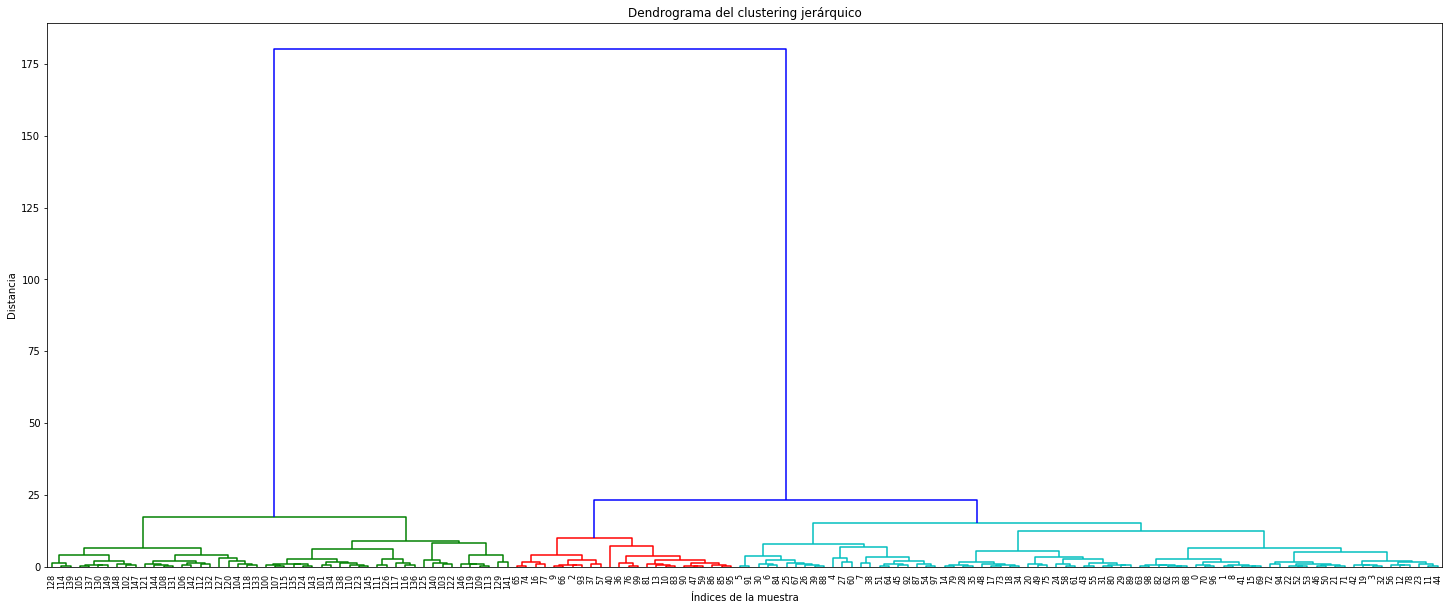

In [15]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90.,leaf_font_size=8.0, color_threshold = 0.1 * 180) #con color_threshold, puedo manipular el color de la división de cluster 0.1 (10%) de 180 la distancia final tomado de a linea anterior, si no se especifpica será el 70% 
plt.show()

### Truncar el dendrograma

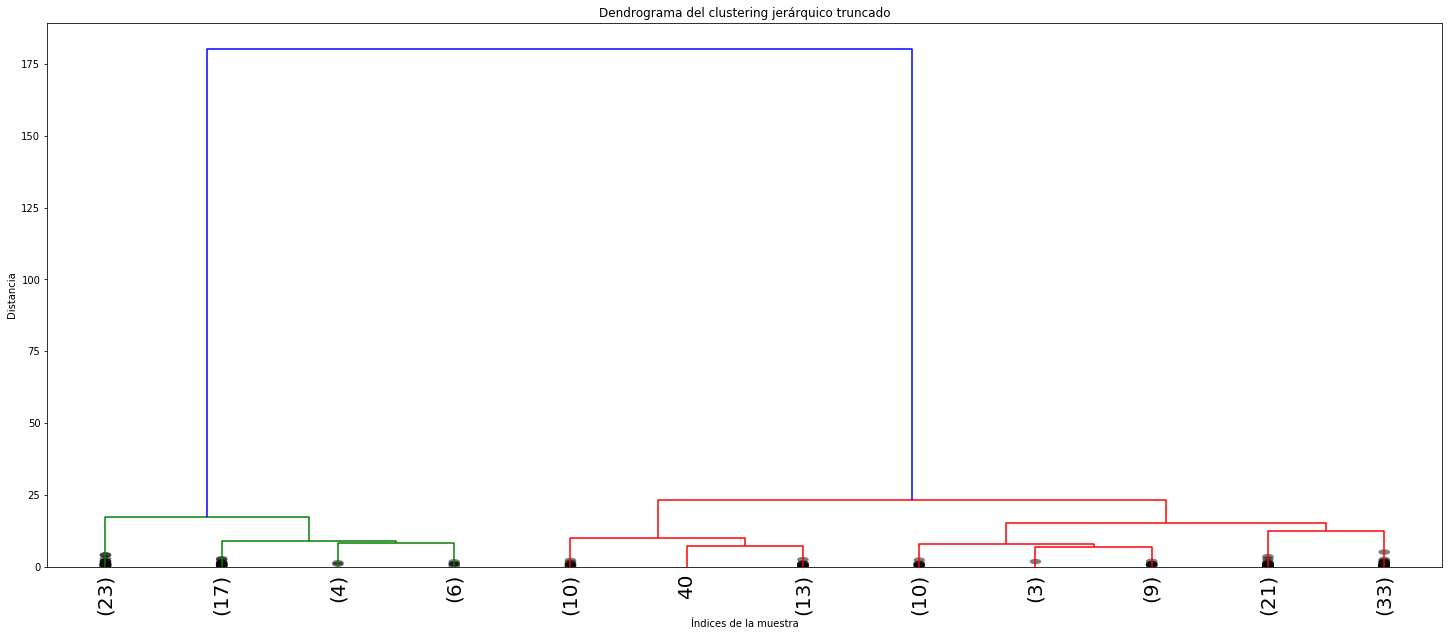

In [16]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90.,leaf_font_size=20, color_threshold = 0.7 * 180,
           truncate_mode = "lastp", p=12, show_leaf_counts=True, show_contracted=True) # show_leaf_counts, oculta los elementos de los nodos hoja, show_contracted, contrae elementos 
plt.show()

### Dendrograma tuneado

In [17]:
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threhold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    
        
    if not kwargs.get('no-plot', False):
        plt.title("Clustering jerárquico con dendrograma truncado")
        plt.xlabel("índice del Dataset (o tamalo del clusrer)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                    plt.plot(x,y, 'o', c=c)
                    plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                                textcoords = "offset points", va = "top", ha="center")
    if max_d:
        plt.axhline(y=max_d, c='k')
    return ddata

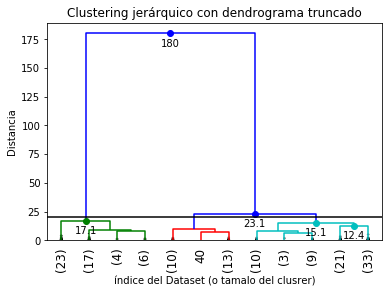

In [18]:
dendrogram_tune(Z,truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above = 10, max_d=20)
plt.show()

### Corte autómatico de endrograma

inconsistency_i =(h_i-avg(h_j)/std(h_j))

In [19]:
from scipy.cluster.hierarchy import inconsistent

In [20]:
depth = 5
incon = inconsistent(Z, depth)
incon[-10:] # Nos da, el promedio en la primera columna, la desviación estándar, el count, el numero de elemntos y el factor de inconsistencia 

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

### Método del códo

In [21]:
last = Z[-10:,2]
last

array([  7.11106083,   7.86878542,   8.04935282,   8.74822275,
         9.84427829,  12.42734657,  15.11533118,  17.11527362,
        23.12198936, 180.27043021])

In [22]:
last_rev = last[::-1] ## Con esto tomo todo el arreglo y le doy una vuelta al colocarle el -1
last_rev

array([180.27043021,  23.12198936,  17.11527362,  15.11533118,
        12.42734657,   9.84427829,   8.74822275,   8.04935282,
         7.86878542,   7.11106083])

In [23]:
idx = np.arange(1, len(last)+1)
idx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

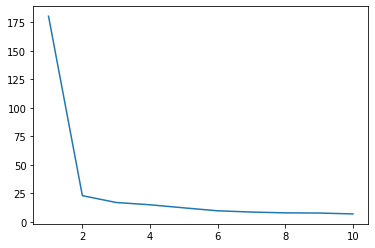

In [24]:
plt.plot(idx, last_rev)

In [25]:
acc = np.diff(last, 2)
acc

array([-5.77157189e-01,  5.18302524e-01,  3.97185622e-01,  1.48701273e+00,
        1.04916333e-01, -6.88042176e-01,  4.00677330e+00,  1.51141725e+02])

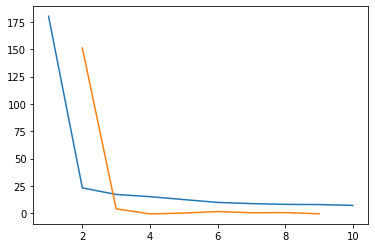

El numero máximo de clusters es 2


In [35]:
acc_rev = acc[::-1]
plt.plot(idx, last_rev)
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax()+2
print("El numero máximo de clusters es %s"%str(k))


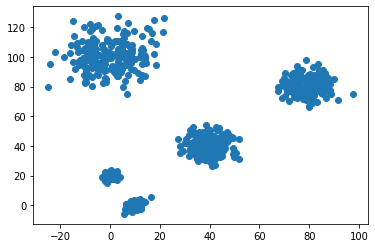

In [84]:
c = np.random.multivariate_normal([40, 40] , [[20,1], [1, 30]], size = [200,])
d = np.random.multivariate_normal([80, 80] , [[30,1], [1, 30]], size = [200,])
e = np.random.multivariate_normal([0, 100] , [[100,1], [1, 100]], size = [200,])
X2 = np.concatenate((X, c, d, e))
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [85]:
Z2 = linkage(X2, "ward")

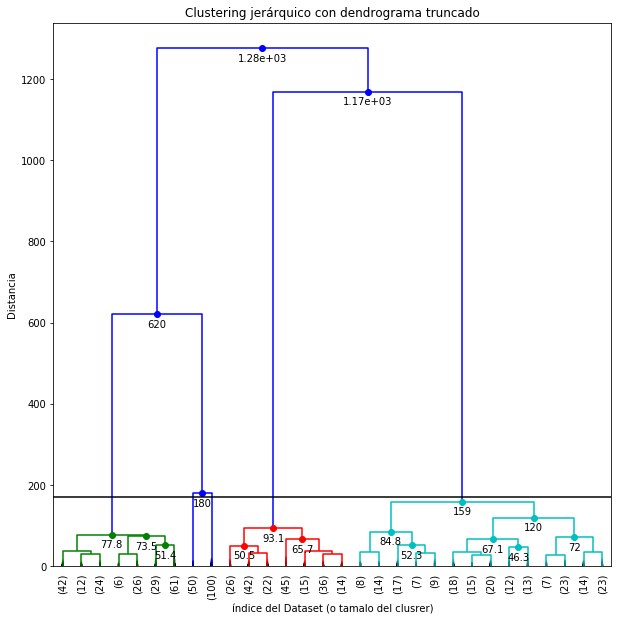

In [114]:
plt.figure(figsize=(10, 10))
dendrogram_tune(
    Z2,truncate_mode = "lastp",
    p=30,
    leaf_rotation=90., 
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=40,
    max_d = 170
)
plt.show()

[1275.01837578 1168.91102402  620.29821592  180.27043021  158.99668939
  119.6817571    93.05371957   84.83214352   77.7988647    73.52525162]
[-442.50545633  108.58502239  418.75404489  -18.04119147   12.68689476
   18.40646148    1.18829724    2.75966573]


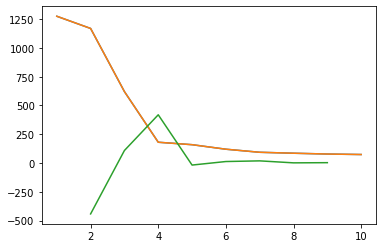

El numero máximo de clusters es 4


In [96]:
last = Z2[-10:,2]
last
last_rev = last[::-1] ## Con esto tomo todo el arreglo y le doy una vuelta al colocarle el -1
print(last_rev)
plt.plot(idx, last_rev)
acc = np.diff(last, 2)
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx, last_rev)
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax()+2
print("El numero máximo de clusters es %s"%str(k))

In [97]:
print(inconsistent(Z2, 5)[-10:])

[[ 13.0257531   15.87492517  29.           3.81101   ]
 [ 17.62215621  19.3794706   31.           3.10517814]
 [ 14.27567965  18.26177585  27.           3.8636146 ]
 [ 18.66167662  19.80885423  31.           3.75549449]
 [ 23.53688963  24.7207093   30.           3.88924388]
 [ 34.76011741  35.061652    30.           3.54337474]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 44.24056516 112.26949074  31.           5.13102578]
 [ 78.49415622 205.28914125  31.           5.31161493]
 [146.91967405 307.59190374  31.           3.66751754]]


## Recuperar los clusters y sus elementos

In [99]:
from scipy.cluster.hierarchy import fcluster

In [100]:
max_d = 20
cluster = fcluster(Z, max_d, criterion="distance")
cluster

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [103]:
k = 3
cluster = fcluster(Z, k, criterion="maxclust")
cluster

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [104]:
fcluster(Z, 8, depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

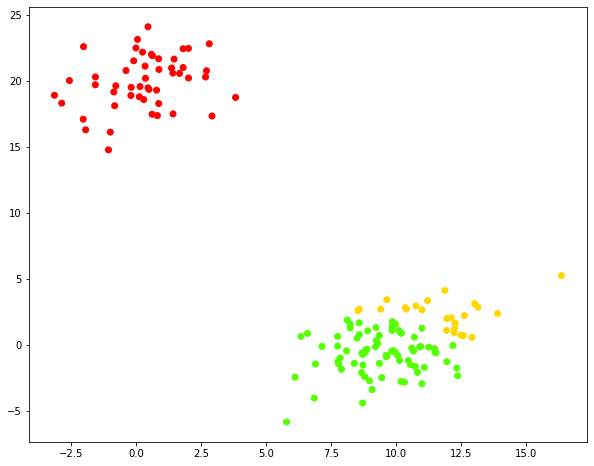

In [106]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0],X[:,1], c=cluster, cmap="prism")
plt.show()

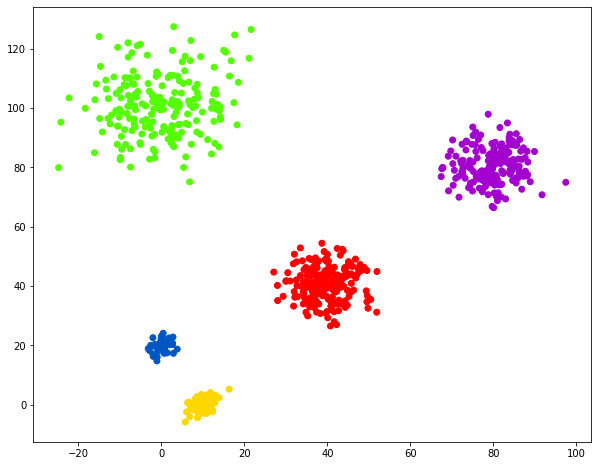

In [113]:
max_d = 170
cluster = fcluster(Z2, max_d, criterion="distance")
cluster
plt.figure(figsize=(10, 8))
plt.scatter(X2[:,0],X2[:,1], c=cluster, cmap="prism")